In [1]:
import os
import autopluspy

import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/charlespaulasvictor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charlespaulasvictor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Config
dataset_file_path = os.path.join('data', 'Data_cars.csv')
reg_mdl_filename = 'final_reg.sav'
std_mdl_filename = 'final_std.sav'
features_filename = 'final_features.sav'

In [3]:
# Load Data
X, y, quanti_features, quali_features = autopluspy.data_eng.learn_set(dataset_file_path, 'Price')

# Drop duplicated content
Dataset shape :  (166695, 9)
# After process
Dataset shape :  (166695, 9)
# Drop column and rows containing missing value
Dataset shape :  (166695, 9)
# After process
Dataset shape :  (166695, 9)
shape before NLP :  (166695, 19)
## Copy Description
## Extract Option
## Remove special caracters
## Tokenize
## Stemmize
## Count Vect
(166695, 119306)
## PCA
## PCA Fit
## PCA Transform
shape after NLP :  (166695, 119)
# Drop column and rows containing missing value
Dataset shape :  (166695, 117)
# After process
Dataset shape :  (166695, 117)
Shape before removing outlier :  (166695, 117)
Shape after removing outlier :  (166655, 117)
Shape before removing outlier :  (166655, 117)
Shape after removing outlier :  (166526, 117)
Shape before removing outlier :  (166526, 117)
Shape after removing outlier :  (166320, 117)
Shape before removing outlier :  (166320, 117)
Shape after removing outlier :  (166432, 117)
# Drop column and rows containing missing value
Dataset sh

In [4]:
# Split
X_train, y_train, X_test, y_test = autopluspy.machine_learning.split_train_test(X, y, 0.2)

# Train
reg = autopluspy.machine_learning.Model(X_train, y_train, X_test, y_test, quanti_features)

/Users/charlespaulasvictor/Documents/HETIC/M2/ANN/projet/car-price-prediction-ml/autopluspy/machine_learning.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.x_train_scaled[quanti_features] = self.scale_mdl.transform(self.x_train[quanti_features])
/Users/charlespaulasvictor/Documents/HETIC/M2/ANN/projet/car-price-prediction-ml/venv/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/charlespaulasvictor/Documents/HETIC/M2/A

In [5]:
#reg.grid_search()

In [6]:
cv_score = reg.cross_val(5)

[ 11.17597224 248.19448917  11.82020865  28.2033293   11.2957599 ]


In [7]:
#np.mean(cv_score)

In [8]:
reg.performance()

Coefficient of determination:  0.8218837252955363
MAPE:  23.26974991374741
MAPE Power Transformed:  11.483237198212343


In [9]:
reg.export(reg_mdl_filename, std_mdl_filename, features_filename)

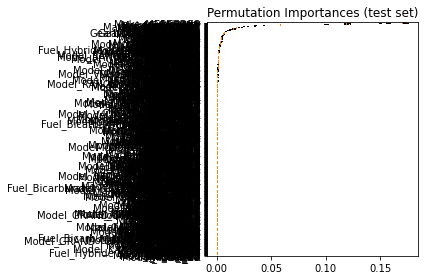

In [10]:
reg.permutation_importance()

In [11]:
#!streamlit run app.py